In [7]:
from __future__ import division, print_function
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage import io
import matplotlib.pyplot as plt
from skimage import data
from skimage.exposure import histogram
import numpy as np
from matplotlib import pyplot as plt, cm
from skimage import img_as_float
from skimage import exposure
from skimage import filters
from skimage import restoration
import pandas as pd

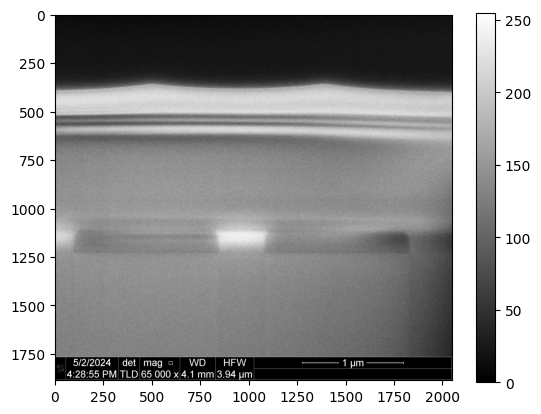

In [34]:
image = io.imread('GM_010.tif', plugin='matplotlib')
#image = image[1000:1300,0:2000]
plt.imshow(image)
plt.colorbar()

First, let's find the scale of each pixel as compared to the scale provided in the image

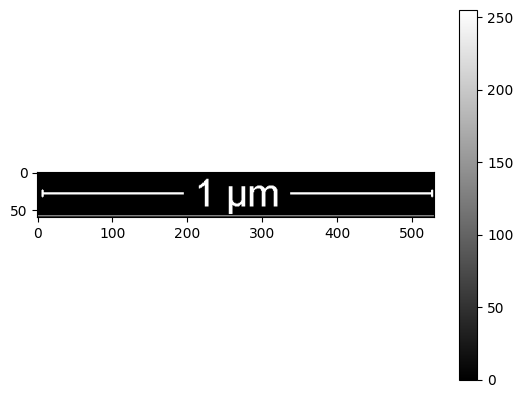

In [39]:
imscale = image[1770:1830,1270:1800]
plt.imshow(imscale)
plt.colorbar()

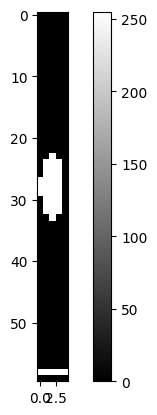

In [45]:
# Finding the right side
imscale = image[1770:1830,1795:1800]
plt.imshow(imscale)
plt.colorbar()

# Looks like it is at about pixel x = 1797

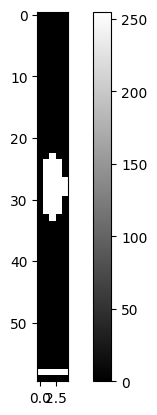

In [51]:
# Finding the left side
imscale = image[1770:1830,1275:1280]
plt.imshow(imscale)
plt.colorbar()

# Looks like it is at about pixel x = 1277

In [134]:
pw = 1/(1797-1277)
pw

0.0019230769230769232

Therefore, 1 micron = 1797 - 1277 pixels = 520 pixels

So, each pixel is about 0.0019 microns (1.9 nm). We have the variable pw to define this length.

Now, let's find the width and height of each waveguide

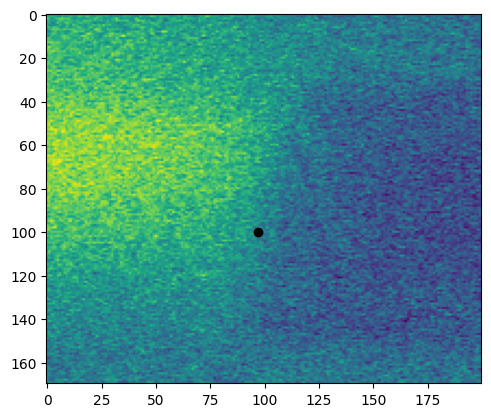

In [86]:
# First, finding the left side
imw1 = image[1080:1250,0:200]

plt.imshow(imw1, cmap = 'viridis')
plt.scatter(97,100, c='k')
#plt.scatter(800,100, c='k')
plt.show()
#plt.colorbar()

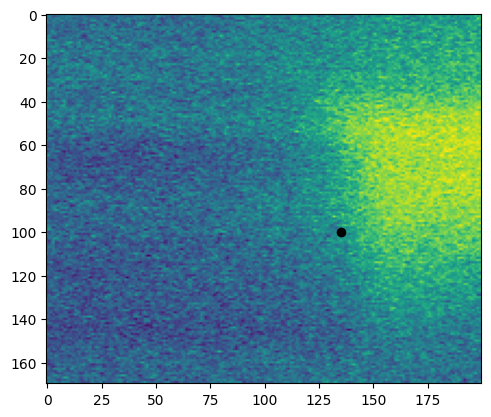

In [91]:
# Finding the right side
imw1 = image[1080:1250,700:900]

plt.imshow(imw1, cmap = 'viridis')
plt.scatter(835-700,100, c='k')
plt.show()
#plt.colorbar()

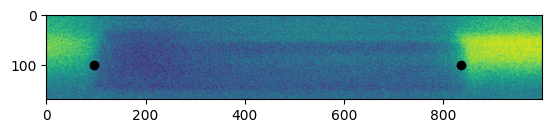

In [92]:
# Plotting points on the original image

imw1 = image[1080:1250,0:1000]

plt.imshow(imw1, cmap = 'viridis')
plt.scatter(97,100, c='k') # Left side
plt.scatter(835,100, c='k') # Right side
plt.show()

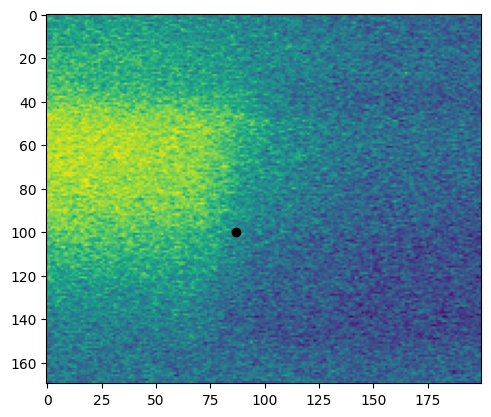

In [98]:
# Now, doing the other waveguide, starting with the left side

imw1 = image[1080:1250,1000:1200]

plt.imshow(imw1, cmap = 'viridis')
plt.scatter(87,100, c='k') # Left side
plt.show()

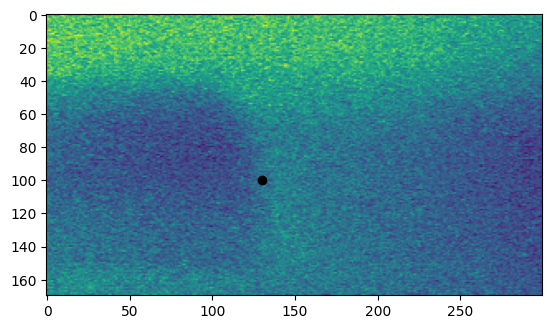

In [101]:
# Now, the right side

imw1 = image[1080:1250,1700:2000]

plt.imshow(imw1, cmap = 'viridis')
plt.scatter(130,100, c='k') # Left side
plt.show()

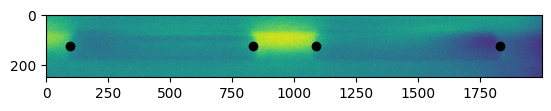

In [106]:
# Plotting the original image again

imw1 = image[1050:1300,0:2000]

plt.imshow(imw1, cmap = 'viridis')
plt.scatter(97,125, c='k') # Left side of waveguide 1
plt.scatter(835,125, c='k') # Right side of waveguide 1
plt.scatter(1000+87,125, c='k') # Left side waveguide 2
plt.scatter(1700+130,125, c='k') # Right side waveguide 2
plt.show()

Now finding the height of the waveguides

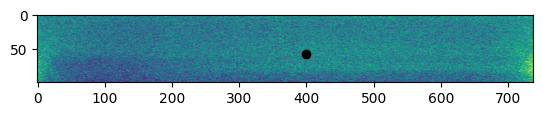

In [119]:
# Top of the waveguide 1

imw1 = image[1050:1150,97:835]

plt.imshow(imw1, cmap = 'viridis')
plt.scatter(400,58, c='k') # Top of waveguide 1

#plt.scatter(97,125, c='k') # Left side of waveguide 1
#plt.scatter(835,125, c='k') # Right side of waveguide 1
#plt.scatter(1000+87,125, c='k') # Left side waveguide 1
#plt.scatter(1700+130,125, c='k') # Right side waveguide 1
plt.show()

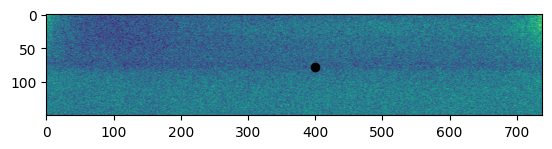

In [126]:
# Bottom of the waveguide 1

imw1 = image[1150:1300,97:835]

plt.imshow(imw1, cmap = 'viridis')
plt.scatter(400,77, c='k') # Bottom of waveguide 1

#plt.scatter(97,125, c='k') # Left side of waveguide 1
#plt.scatter(835,125, c='k') # Right side of waveguide 1
#plt.scatter(1000+87,125, c='k') # Left side waveguide 1
#plt.scatter(1700+130,125, c='k') # Right side waveguide 1
plt.show()

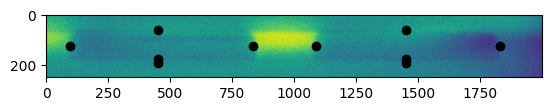

In [143]:
# Replotting these points to visualize

imw1 = image[1050:1300,0:2000]

plt.imshow(imw1, cmap = 'viridis')
plt.scatter(97,125, c='k') # Left side of waveguide 1
plt.scatter(835,125, c='k') # Right side of waveguide 1
plt.scatter(450,58, c='k') # Top of waveguide 1
plt.scatter(450,177, c='k') # Bottom of waveguide 1
plt.scatter(450,192, c='k') # Bottom of waveguide 1, at .26 microns


plt.scatter(1000+87,125, c='k') # Left side waveguide 2
plt.scatter(1700+130,125, c='k') # Right side waveguide 2
plt.scatter(1450,58, c='k') # Top of waveguide 2
plt.scatter(1450,177, c='k') # Bottom of waveguide 2
plt.scatter(1450,192, c='k') # Bottom of waveguide 2, at .26 microns
# plt.xlim([200,500])
plt.show()

In [135]:
pw*(177-58)

0.22884615384615387

In [137]:
177-58

119

In [136]:
# Present simulations use a height of .26 microns, How many pixels would that be?

0.26/pw

135.2

## Automating the Process wiht Scitkit-image

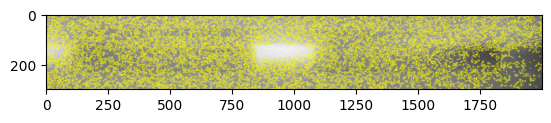

In [33]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import data
from skimage.metrics import adapted_rand_error, variation_of_information
from skimage.filters import sobel
from skimage.measure import label
from skimage.util import img_as_float
from skimage.feature import canny
from skimage.morphology import remove_small_objects
from skimage.segmentation import (
    morphological_geodesic_active_contour,
    inverse_gaussian_gradient,
    watershed,
    mark_boundaries,
)

#grad = ski.segmentation.inverse_gaussian_gradient(image, alpha=50, sigma=5)

edges = canny(image)
fill_coins = ndi.binary_fill_holes(edges)
im_test2 = ndi.label(remove_small_objects(fill_coins, ))[0]
grad = ski.segmentation.mark_boundaries(image, im_test2)

plt.imshow(grad)

In [29]:
from skimage.filters import threshold_otsu, threshold_local


#image = median_filtered[0:400, 400:800]

image = grad

global_thresh = threshold_otsu(image)
binary_global = image > global_thresh + .0

block_size = 511
adaptive_thresh = threshold_local(image, block_size, offset=0)
binary_adaptive = image > adaptive_thresh

fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax = axes.ravel()
plt.gray()

ax[0].imshow(image)
ax[0].set_title('Original')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')

ax[2].imshow(binary_adaptive)
ax[2].set_title('Adaptive thresholding')

for a in ax:
    a.axis('off')

plt.show()

C:\Users\sdgab\AppData\Local\Temp\ipykernel_29620\1727078759.py:8: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (300, 2000, 3) looks like that of an RGB image.
  global_thresh = threshold_otsu(image)


ValueError: Unsupported dtype

<Figure size 700x800 with 3 Axes>